###ID: 190041220

Tasfia Tasneem Annesha

CSE'19

##Importing Libraries

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

***class***

In [ ]:
class LinearRegression:
    def __init__(self, lr = 0.001, n_iters = 100):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.mse_values = list([])

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            self.mse_values.append(np.mean((y_predicted - y)**2))
            
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted 

In [ ]:
X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 7)
print(X.shape,y.shape)

(100, 1) (100,)


In [ ]:
y

array([   7.74874748,   48.30195813,  -99.86839046,  170.69731585,
         35.38423095,  -24.26065523,   53.38022553,   40.93769612,
        -58.37929858,  -40.00080755,   -5.72402446,  -32.41843535,
       -185.39492942,   16.10110541,   40.41032161,   65.57471889,
        -91.91302503,  109.79950356,   20.67535726,  -55.90394033,
        -31.48725571,  -34.18809808,   -7.62204079,    0.66585166,
          6.58245201, -137.86783118,   28.96765275,  -56.66561448,
        -27.38686869,    2.47905123,  119.3324661 ,  -25.36827924,
         37.61826504,   15.71208367,   35.29998191,  -47.8891707 ,
       -115.4023037 ,   -6.29475666,  -35.05780108,  135.50674081,
        -43.00213356,    4.5838433 ,   -9.24111836,   90.55005602,
        -42.13259317,   97.48433802,  138.54538857,  104.45930872,
         13.3261784 ,  -32.12098101,   51.52040062,  -99.90017385,
         10.88356439,  -22.16972415,  150.6949243 ,   29.52128207,
       -126.014095  ,   -5.93723276,   -5.30531644,   71.23691

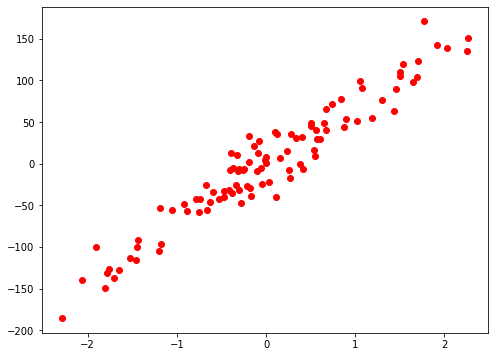

In [ ]:
fig =plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y,color='r',marker ='o')
plt.show()

In [ ]:
#test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7) 
X_train.shape

(80, 1)

In [ ]:
regressor =LinearRegression(lr =0.001,n_iters =10000)
regressor.fit(X_train,y_train)


In [ ]:
predicted= regressor.predict(X_test)

In [ ]:
y_test

array([  -6.29475666,   28.96765275,   54.52190665,  -55.73406339,
        -32.12098101,   65.57471889,  -52.89627393,   31.19797233,
       -149.07075314,   -7.62204079,   16.10110541,  -43.00213356,
         10.88356439, -185.39492942,   -7.55831063,   97.48433802,
        -32.41843535, -140.0584903 ,  -31.48725571,   20.67535726])

In [ ]:
predicted

array([ -20.90190242,   41.38929807,   82.39416477,  -72.82028561,
        -28.98147773,   46.65724654,  -82.75515468,   22.80840514,
       -124.93077671,  -18.24788994,   36.8867518 ,  -51.54495826,
        -22.95720707, -158.5059681 ,   17.31446106,  114.05935271,
        -32.81857505, -143.01289179,  -20.9352896 ,   -9.32300296])

In [ ]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

In [ ]:
mse(predicted,y_test)

387.4268402120403

In [ ]:
def draw_line (X_train, y_train, X_test, y_test, predicted):
  fig =plt.figure(figsize=(8,6))
  plt1 = plt.scatter(X_train, y_train, color = 'b')
  plt2 = plt.scatter(X_test, y_test, color = 'r')
  plt.plot(X_test,predicted,color='black',linewidth = 2)


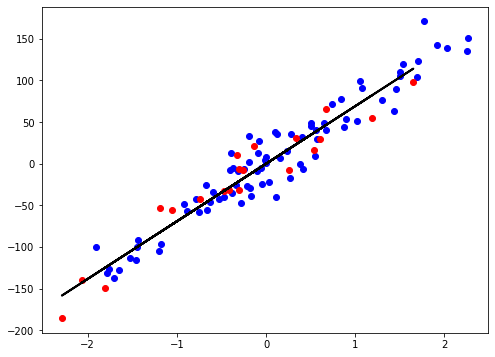

In [ ]:
draw_line(X_train, y_train, X_test, y_test, predicted)

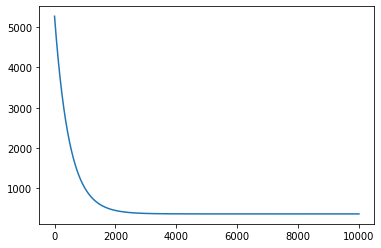

In [ ]:
plt.plot(regressor.mse_values)

In [ ]:
import pandas as pd
import seaborn as sns
!gdown 1m_uJkaKZvX24wdyAjXFIxTUY3SIawaCF

Downloading...
From: https://drive.google.com/uc?id=1m_uJkaKZvX24wdyAjXFIxTUY3SIawaCF
To: /content/CarPrice.csv
100% 26.7k/26.7k [00:00<00:00, 32.7MB/s]


#Load Prices in pandas data frame from a csv (excel) file


**Read data**- read_csv()

*In the following section the first 5 rows of the dataset are shown to give a brief overview of the dataset.*

In [48]:
data = pd.read_csv('/content/CarPrice.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


wheelbase continuous

for some of the features list of possible values are fixed

shows the *columns and rows of the dataset*


In [57]:
data.shape

(205, 26)

**numericL features**

In [50]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


##Here we can see the names of the columns, their data types and the non-Null values count.

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [52]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# ***Data Cleaning:***

In [53]:
carnames = data['CarName']
CompanyNames = []

for carname in carnames:
    brand = carname.split(" ")[0]
    CompanyNames.append(brand)

data.drop(['CarName'], axis = 1, inplace = True)
data.insert(3, "CompanyName", CompanyNames)

data.head()

,car_ID,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [54]:
data.CompanyName = data.CompanyName.str.lower()

In [55]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [56]:
data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

#***split fueltype coloumn in two different colums gas and disel:***

#**CREATE DUMMY VARIABLE COLUMNS**

In [ ]:
temp =pd.get_dummies(data['fueltype'])

In [ ]:
temp.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


#drop original fueltype data column


In [ ]:
data.drop(['fueltype'],axis=1,inplace=True)

#CONCATINATE COLUMNS

### axis=1 ->column



In [ ]:
data=pd.concat([data,temp],axis=1)# as we are adding column we are concatinating coloum axis

In [ ]:
data.head()

,car_ID,symboling,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,gas
0,1,3,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1
1,2,3,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1
2,3,1,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1
3,4,2,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1
4,5,2,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1


#***Training model***

Training data set size 0.8 as here test set size is 0.2

In [ ]:
data_train, data_test = train_test_split(data, test_size = 0.2)

In [ ]:
len(X_train)

164

In [ ]:
len(X_test)

41

In [ ]:
X_train

array([[ 99.1, 186.6, 110. ,   0. ,   1. ],
       [104.5, 187.8, 156. ,   0. ,   1. ],
       [ 95.7, 169.7,  62. ,   0. ,   1. ],
       [ 93.7, 157.3,  68. ,   0. ,   1. ],
       [ 97.2, 173.4,  97. ,   0. ,   1. ],
       [101.2, 176.8, 101. ,   0. ,   1. ],
       [ 98.4, 176.2, 116. ,   0. ,   1. ],
       [113. , 199.6, 176. ,   0. ,   1. ],
       [101.2, 176.8, 121. ,   0. ,   1. ],
       [102.4, 175.6,  73. ,   1. ,   0. ],
       [ 93.7, 150. ,  76. ,   0. ,   1. ],
       [ 96.6, 180.3, 155. ,   0. ,   1. ],
       [ 94.5, 155.9,  70. ,   0. ,   1. ],
       [ 98.4, 175.7, 288. ,   0. ,   1. ],
       [ 98.8, 177.8,  84. ,   0. ,   1. ],
       [ 99.1, 186.6, 110. ,   0. ,   1. ],
       [ 88.6, 168.8, 111. ,   0. ,   1. ],
       [ 95.7, 158.7,  62. ,   0. ,   1. ],
       [ 96.5, 175.4, 101. ,   0. ,   1. ],
       [ 94.5, 168.7, 112. ,   0. ,   1. ],
       [ 93.7, 150. ,  76. ,   0. ,   1. ],
       [ 93.7, 167.3,  68. ,   0. ,   1. ],
       [ 95.9, 173.2, 145. ,   0

In [ ]:
data_train.head()

,car_ID,symboling,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,gas
132,133,3,saab,std,two,hatchback,fwd,front,99.1,186.6,...,3.54,3.07,9.31,110,5250,21,28,11850.0,0,1
181,182,-1,toyouta,std,four,wagon,rwd,front,104.5,187.8,...,3.27,3.35,9.20,156,5200,19,24,15750.0,0,1
155,156,0,toyota,std,four,wagon,4wd,front,95.7,169.7,...,3.05,3.03,9.00,62,4800,27,32,8778.0,0,1
25,26,1,dodge,std,four,sedan,fwd,front,93.7,157.3,...,2.97,3.23,9.40,68,5500,31,38,6692.0,0,1
99,100,0,nissan,std,four,hatchback,fwd,front,97.2,173.4,...,3.33,3.47,8.50,97,5200,27,34,8949.0,0,1


In [ ]:
faeture_columns = ['wheelbase', 'carlength', 'horsepower', 'diesel', 'gas']
X_train = data_train[faeture_columns].values
X_test = data_test[faeture_columns].values
y_train = data_train['price'].values
y_test = data_test['price'].values
X_train.shape

(164, 5)

#creating linear regression object-'regressor'
object creation for linear regression from sklearn linear_model

then fitting data->training model

1st arg- 2d array

2nd arg- y axis

then predicting prices



In [ ]:
regressor = LinearRegression(lr = 0.000000000000001, n_iters = 1000)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [ ]:
regressor.predict(330)

array([4.45858266e-04, 7.90347644e-04, 5.40027085e-04, 5.80231247e-07,
       3.85184042e-06])

In [ ]:
mse(predicted, y_test)

222716164.80540848